# Dataset exploration

> Dataset: covid_19_indonesia.csv

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

## Load Dataset

In [2]:
dataset_fp = Path().cwd().parent.joinpath("data", "covid_19_indonesia.csv")
dataset = pd.read_csv(dataset_fp)

### Format the Dataset

In [3]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
numeric_dataset = dataset.select_dtypes(include=[np.number])

                                Date     New Cases    New Deaths  \
count                          31822  31822.000000  31822.000000   
mean   2021-06-17 19:32:22.882282752    402.311388      9.920652   
min              2020-03-01 00:00:00      0.000000      0.000000   
25%              2020-11-03 00:00:00      3.000000      0.000000   
50%              2021-06-18 00:00:00     27.000000      0.000000   
75%              2022-01-31 00:00:00    130.000000      3.000000   
max              2022-09-16 00:00:00  64718.000000   2069.000000   
std                              NaN   2320.629838     64.139080   

       New Recovered  New Active Cases   Total Cases   Total Deaths  \
count   31822.000000      31822.000000  3.182200e+04   31822.000000   
mean      390.398498          1.992238  1.594500e+05    4564.753221   
min         0.000000     -29938.000000  1.000000e+00       0.000000   
25%         2.000000        -12.000000  5.223250e+03     128.000000   
50%        20.000000          0.

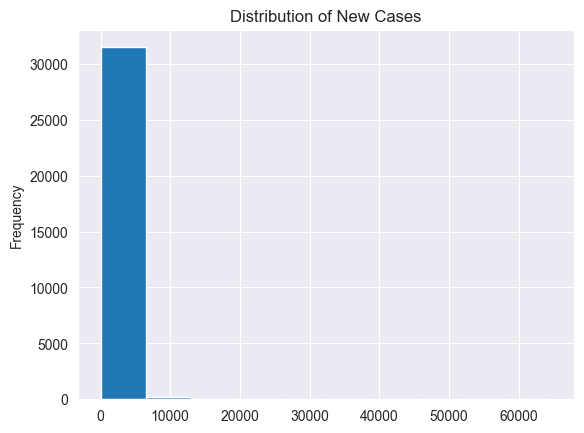

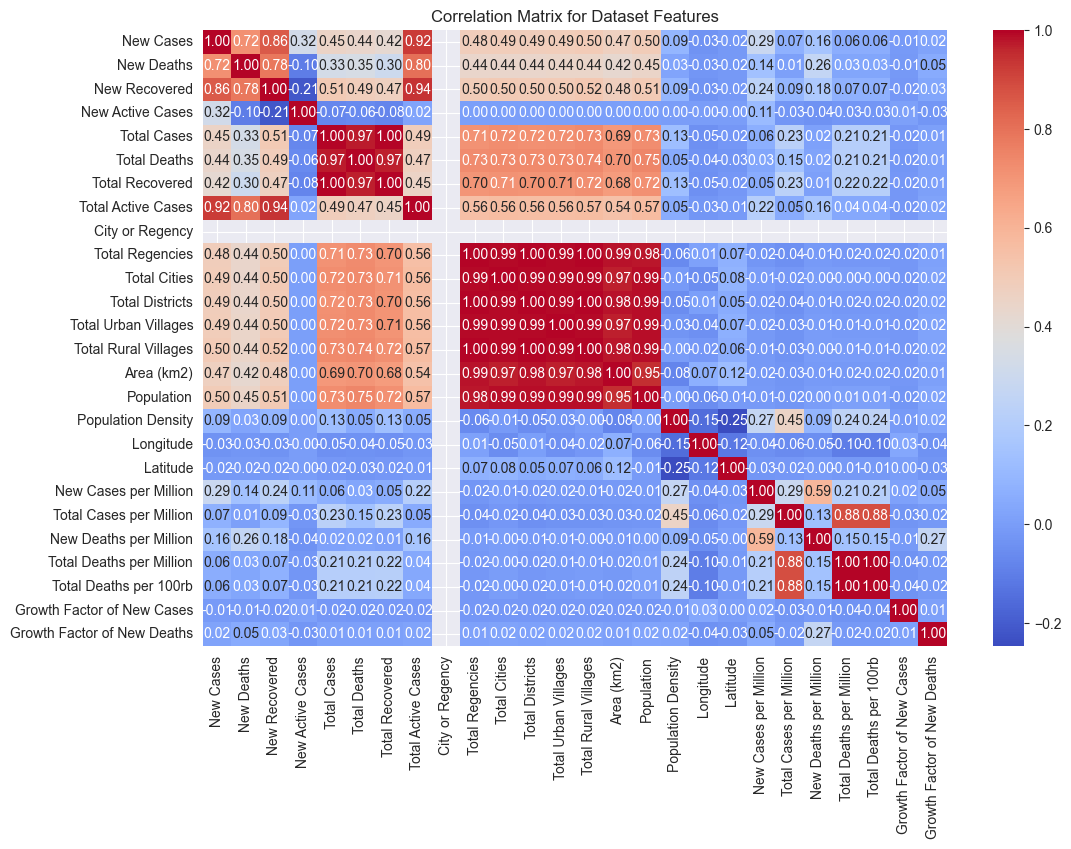

Number of outliers detected in 'New Cases': 286


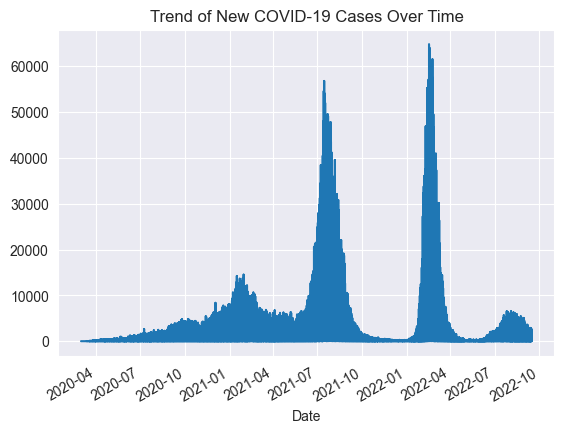

In [4]:
# Descriptive statistics
print(dataset.describe())

# Check for missing values
print(dataset.isnull().sum())

# Check for duplicate rows
print(dataset.duplicated().sum())

# Data distribution for a key feature, e.g., 'New Cases'
dataset['New Cases'].plot(kind='hist', title='Distribution of New Cases')

# Correlation matrix heatmap
correlation_matrix = numeric_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Dataset Features')
plt.show()

# Time Series trend of 'New Cases'
dataset.set_index('Date')['New Cases'].plot(title='Trend of New COVID-19 Cases Over Time')

# Outliers detection for 'New Cases' using Z-score
dataset['Z-score'] = stats.zscore(dataset['New Cases'])
outliers = dataset[(dataset['Z-score'] > 3) | (dataset['Z-score'] < -3)]
print(f"Number of outliers detected in 'New Cases': {len(outliers)}")